# Support Vector Machine Classification

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

sns.set(style='ticks', palette='bright')
%matplotlib inline

In [16]:
try:
    os.chdir(os.path.join(os.path.dirname(os.getcwd()), r'mlclass-ex6-006\mlclass-ex6'))
    print(os.getcwd())
except:
    pass

## Linear SVM

In [17]:
import scipy.io as sio

data1_mat = sio.loadmat('ex6data1.mat')
data1 = pd.DataFrame(data=np.hstack((data1_mat['X'], data1_mat['y'])), columns=['X1', 'X2', 'y'])

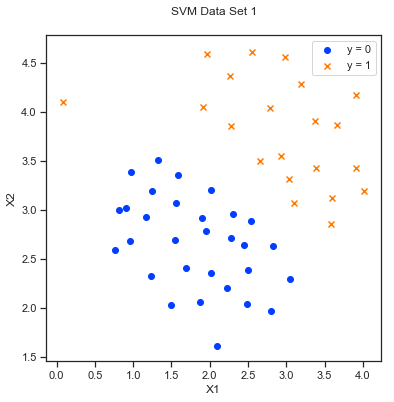

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(data1.X1[data1.y==0], data1.X2[data1.y==0], marker='o', label='y = 0')
ax.scatter(data1.X1[data1.y==1], data1.X2[data1.y==1], marker='x', label='y = 1')
ax.set_title('SVM Data Set 1', pad=20)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
None

In [19]:
X = data1.loc[:, ['X1','X2']].to_numpy()
y = data1.loc[:, 'y'].to_numpy()
m = len(y)

### SVM modules in scikit-learn
### 1. LinearSVC

In [20]:
from sklearn.svm import LinearSVC

svm_clf1 = LinearSVC(C=1, loss='hinge', max_iter=10000)
svm_clf1.fit(X, y)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=10000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

[sklearn plot iris](https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html)

In [21]:
def make_meshgrid(x, y, step=.02):
    '''Generate a mesh of points to plot decision boundary
    
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize
    
    return xx, yy : ndarray
    '''
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    return xx, yy

def contour_z(clf, xx, yy):
    '''Generate 'z' for coutour plotting
    
    clf: the classifier to output predictions 'z'
    xx, yy: meshgrid narrays
    
    return z: ndarray prediction, mapping from xx and yy through clf.predict
    '''
    X_new = np.c_[xx.ravel(), yy.ravel()] 
    y_new = clf.predict(X_new)
    z = y_new.reshape(xx.shape)
    return z

In [22]:
xx, yy = make_meshgrid(X[:, 0], X[:, 1])
z = contour_z(svm_clf1, xx, yy)

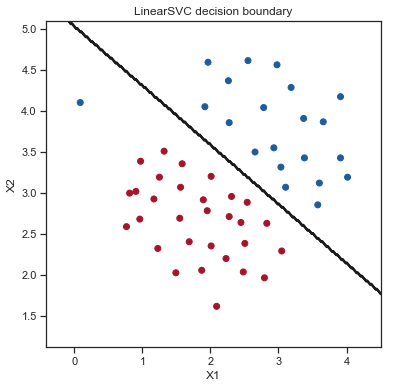

In [24]:
fig, ax = plt.subplots(figsize=(6,6))
ax.contour(xx, yy, z, colors='k')
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', vmin=-0.1, vmax=1.1)
ax.set(xlabel='X1',
       ylabel='X2', 
       xlim=(xx.min(), xx.max()), 
       ylim=(yy.min(), yy.max()),
       title='LinearSVC decision boundary'
      )
None

### 2. SGD Classifier

Not as consistent as LinearSVC

In [25]:
from sklearn.linear_model import SGDClassifier



svm_clf2 = SGDClassifier(loss='hinge', alpha=1/50, tol=1e-3)  # alpha = 1/(m*C) 
svm_clf2.fit(X, y)

SGDClassifier(alpha=0.02, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

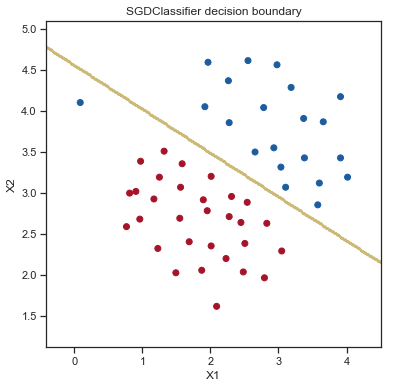

In [26]:
z2 = contour_z(svm_clf2, xx, yy)

fig, ax = plt.subplots(figsize=(6,6))
ax.contour(xx, yy, z2, colors='y')
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', vmin=-0.1, vmax=1.1)
ax.set(xlabel='X1',
       ylabel='X2', 
       xlim=(xx.min(), xx.max()), 
       ylim=(yy.min(), yy.max()),
       title='SGDClassifier decision boundary'
      )
None

### 3. SVC Class
[sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

Time complexity: $O(m^2n)$ to $O(m^3n)$. For linear SVM using kernal='linear', it's much slower than LinearSVC. It's perfect for complex but small training sets.

In [27]:
from sklearn.svm import SVC

svm_clf3 = SVC(kernel='linear')
svm_clf3.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

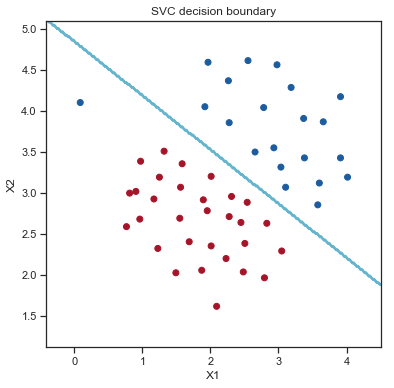

In [30]:
z3 = contour_z(svm_clf3, xx, yy)

fig, ax = plt.subplots(figsize=(6,6))
ax.contour(xx, yy, z3, colors='c')
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', vmin=-0.1, vmax=1.1)
ax.set(xlabel='X1',
       ylabel='X2', 
       xlim=(xx.min(), xx.max()), 
       ylim=(yy.min(), yy.max()),
       title='SVC decision boundary'
      )
None

## Nonlinear SVM, Kernel, and sklearn.svm.SVC

## Strength and Weakness


* Versatile and powerful: kernal tricks.
* High dimensional spaces.
* Effective when $n>m$.
* Use subset of training data (support vector), memory efficient.
* Particularly well suited for classification of complex but small datasets.

* When $n>m$, regularization and kernal choice are crucial.
* Black box, doesn't directly provide probablity estimates. Need 5-fold CV.